In [7]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from climada.hazard import TCTracks
import matplotlib.pyplot as plt

In [ ]:
# using CLIMADA, ETH Zurich
# https://climada-python.readthedocs.io/en/stable/tutorial/climada_hazard_TropCyclone.html

In [ ]:
STORM_ID = "2020136N10088" # Super Cyclonic Storm AMPHAN

# the storm id can be found e.g. on this website https://ncics.org/ibtracs/index.php?name=v04r01-2020136N10088#all 

In [9]:
# Fetch the hurricane track data
tr_hurricane = TCTracks.from_ibtracs_netcdf(
    provider="usa", storm_id=STORM_ID
)

# Get the individual track
track = tr_hurricane.get_track(STORM_ID)

# Extract hurricane name and year for file naming
hurricane_name = track.attrs['name'].lower()
hurricane_year = str(track.attrs['sid'])[:4]  # First 4 digits are the year

print(f"Hurricane: {hurricane_name.upper()}")
print(f"Year: {hurricane_year}")
print(f"Category: {track.attrs['category']}")
print(f"Storm ID: {STORM_ID}")

Hurricane: AMPHAN
Year: 2020
Category: 5
Storm ID: 2020136N10088


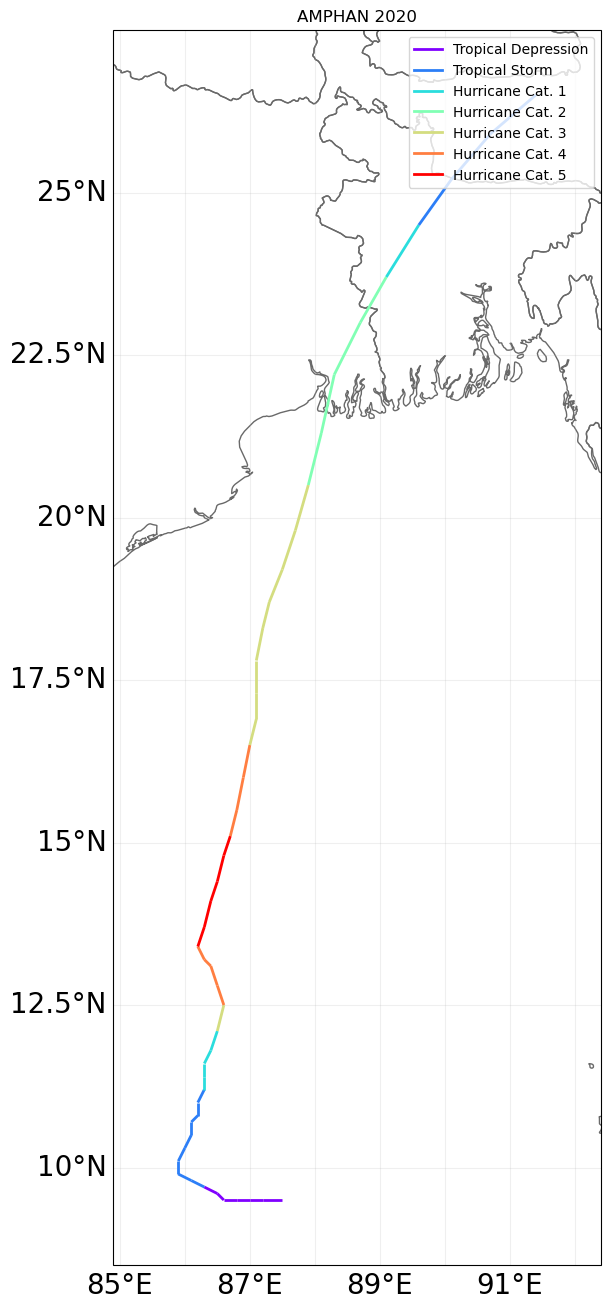

In [10]:
# Plot the hurricane track
ax = tr_hurricane.plot()
ax.set_title(f"{hurricane_name.upper()} {hurricane_year}")
plt.show()

In [11]:
# Convert to DataFrame
df = track.to_dataframe().reset_index()

# Create filenames using hurricane name and year
csv_filename = f'{hurricane_name}_{hurricane_year}_track.csv'
geojson_filename = f'{hurricane_name}_{hurricane_year}_track.geojson'

# Export to CSV
df.to_csv(csv_filename, index=False)
print(f"Exported CSV: {csv_filename}")

# Create GeoDataFrame and export to GeoJSON
geometry = [Point(lon, lat) for lon, lat in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
gdf.to_file(geojson_filename, driver='GeoJSON')
print(f"Exported GeoJSON: {geojson_filename}")

# Show data preview
print(f"\nData columns: {list(df.columns)}")
print(f"Number of track points: {len(df)}")
print(f"\nFirst few rows:")
print(df.head())

Exported CSV: amphan_2020_track.csv
Exported GeoJSON: amphan_2020_track.geojson

Data columns: ['time', 'radius_max_wind', 'radius_oci', 'max_sustained_wind', 'central_pressure', 'environmental_pressure', 'time_step', 'basin', 'lat', 'lon']
Number of track points: 49

First few rows:
                 time  radius_max_wind  radius_oci  max_sustained_wind  \
0 2020-05-15 06:00:00             50.0       150.0                20.0   
1 2020-05-15 09:00:00             50.0       150.0                25.0   
2 2020-05-15 12:00:00             50.0       150.0                30.0   
3 2020-05-15 15:00:00             50.0       150.0                30.0   
4 2020-05-15 18:00:00             50.0       150.0                30.0   

   central_pressure  environmental_pressure  time_step basin  lat        lon  
0            1007.0                  1007.0        3.0    NI  9.5  87.500000  
1            1005.0                  1006.0        3.0    NI  9.5  87.199997  
2            1002.0              

In [12]:
# Display some key statistics
print(f"{hurricane_name.upper()} {hurricane_year} Summary:")
print(f"   Duration: {track.time.values[0]} to {track.time.values[-1]}")
print(f"   Max sustained wind: {df['max_sustained_wind'].max():.1f} kn")
print(f"   Min central pressure: {df['central_pressure'].min():.1f} mb")
print(f"   Track length: {len(df)} data points")

# Show track bounds
print(f"\nGeographic bounds:")
print(f"   Latitude: {df['lat'].min():.2f}° to {df['lat'].max():.2f}°")
print(f"   Longitude: {df['lon'].min():.2f}° to {df['lon'].max():.2f}°")

AMPHAN 2020 Summary:
   Duration: 2020-05-15T06:00:00.000000000 to 2020-05-21T06:00:00.000000000
   Max sustained wind: 145.0 kn
   Min central pressure: 901.0 mb
   Track length: 49 data points

Geographic bounds:
   Latitude: 9.50° to 26.50°
   Longitude: 85.90° to 91.40°
